In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

travis_employment = pd.read_csv("./data/processed_employment/Travis_County,_Texas.csv")
travis_real_estate = pd.read_csv("./data/processed_zillow/Travis_County.csv")

sc_employment = pd.read_csv(
    "./data/processed_employment/Santa_Clara_County,_California.csv"
)
sc_real_estate = pd.read_csv("./data/processed_zillow/Santa_Clara_County.csv")

In [4]:
def graph_real_estates(df, hue_column, vline=None):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))

    # Use hue to differentiate between multiple lines
    sns.lineplot(x="Date", y="Price", hue=hue_column, data=df, marker="o")

    if vline:
        plt.axvline(pd.to_datetime(vline), color="red", linestyle="--", label=f"Treatment: {vline}")

    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

def graph_labors(df, hue_column, vline=None):
    df["Year-Month"] = pd.to_datetime(df["Year-Month"])
    # sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.set_theme()
    sns.lineplot(x="Year-Month", y="Employment", hue=hue_column, data=df, marker="o")

    if vline:
        plt.axvline(pd.to_datetime(vline), color="red", linestyle="--", label=f"Treatment: {vline}")

    plt.title("Employment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Employment")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

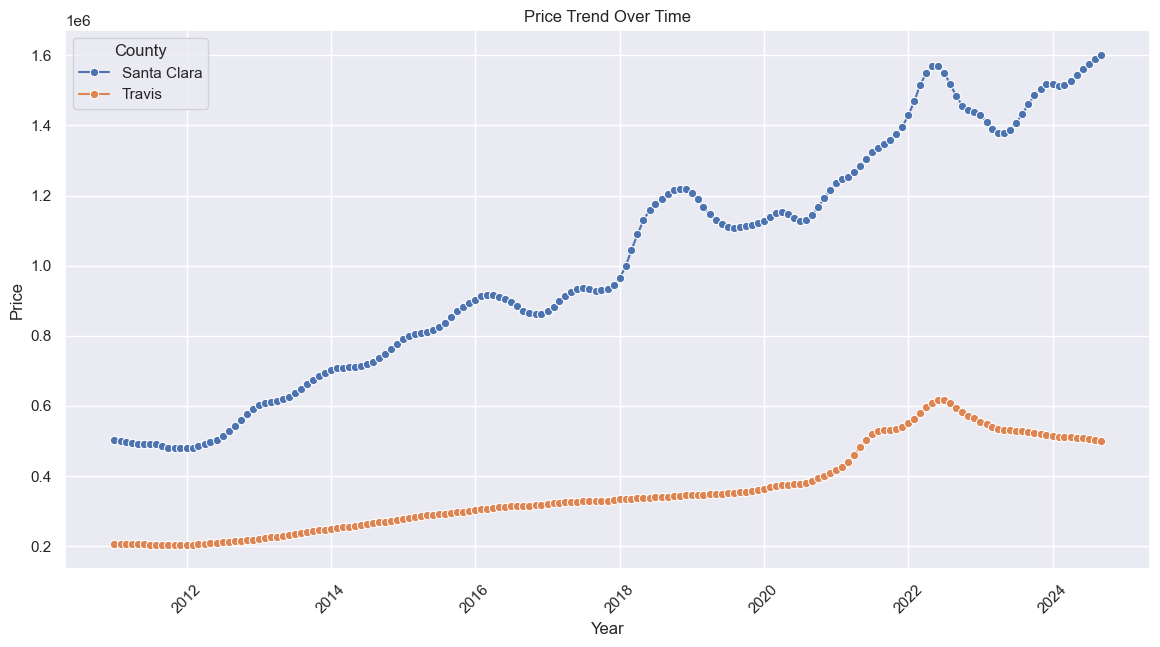

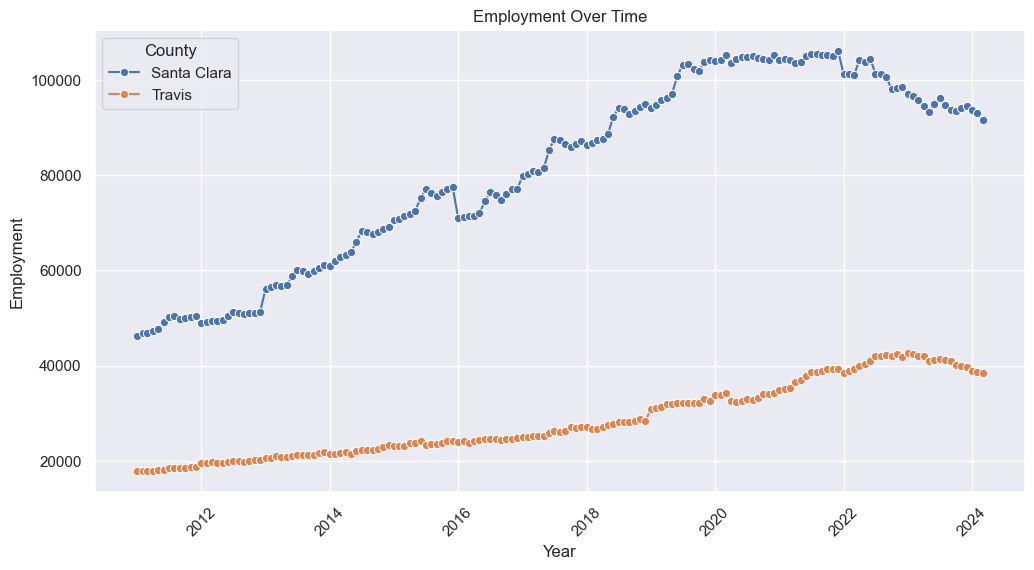

In [6]:
sc_real_estate["County"] = "Santa Clara"
travis_real_estate["County"] = "Travis"
sc_employment["County"] = "Santa Clara"
travis_employment["County"] = "Travis"

sc_and_tr_real_estate = pd.concat([sc_real_estate, travis_real_estate], axis = 0)
sc_and_tr_labors = pd.concat([sc_employment, travis_employment], axis = 0)

graph_real_estates(sc_and_tr_real_estate, "County")
graph_labors(sc_and_tr_labors, "County")